# Assignment: Climate change in the zero-dimensional EBM

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

## Learning goals

Students completing this assignment will gain the following skills and concepts:

- Familiarity with the Jupyter notebook
- Familiarity with the zero-dimensional Energy Balance Model
- Understanding of the adjustment toward equilibrium temperature
- Introduction to the concept of albedo feedback
- Use of numerical timestepping to find the equilibrium temperature
- Python programming skills: arrays, loops, and simple graphs

## Instructions

- In a local copy of this notebook (on the JupyterHub or your own device) **add your answers in additional cells**.
- **Complete the required problems** below. 
- Some assignments have **optional bonus problems**. These are meant to be interesting and thought-provoking, but are not required. Extra credit will be given for interesting answers to the bonus problems.
- Remember to set your cell types to `Markdown` for text, and `Code` for Python code!
- **Include comments** in your code to explain your method as necessary.
- Remember to actually answer the questions. **Written answers are required** (not just code and figures!)
- Submit your solutions in **a single Jupyter notebook** that contains your text, your code, and your figures.
- *Make sure that your notebook* ***runs cleanly without errors:***
    - Save your notebook
    - From the `Kernel` menu, select `Restart & Run All`
    - Did the notebook run from start to finish without error and produce the expected output?
    - If yes, save again and submit your notebook file
    - If no, fix the errors and try again.

## Problem 1: Time-dependent warming in the zero-dimensional Energy Balance Model

In lecture we defined a zero-dimensional energy balance model for the global mean surface temperature $T_s$ as follows

$$ C  \frac{dT_s}{dt} = \text{ASR} - \text{OLR}$$

$$ \text{ASR} = (1-\alpha) Q $$

$$ \text{OLR} = \tau \sigma T_s^4$$

where we defined these terms:

- $C$ is a heat capacity for the atmosphere-ocean column
- $\alpha$ is the global mean planetary albedo
- $\sigma = 5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$ is the Stefan-Boltzmann constant
- $\tau$ is our transmissivity parameter for the atmosphere.
- $Q$ is the global-mean incoming solar radiation, or *insolation*.

Refer back to our class notes for parameter values.

1. If the heat penetrated to twice as deep into the ocean, the value of $C$ would be twice as large. Would this affect the **equilibrium temperature**? Why or why not?

    <span style="color:blue">
    No it would not. Equilibrium occurs when $\frac{dT_s}{dt} = 0$, (ie $ASR$ and $OLR$ are equal to each other) so the value of $C$ has no effect. This *would* change how long it takes for the system to relax to equilibrium
    </span>.



2. In class we used numerical timestepping to investigate a *hypothetical climate change scenario* in which $\tau$ decreases to 0.57 and $\alpha$ increases to 0.32. We produced a graph of $T_s(t)$ over a twenty year period, starting from an initial temperature of 288 K. Here you will repeat this calculation with a larger value of $C$ and compare the warming rates. Specifically:
    - Repeat our in-class time-stepping calculation with the same parameters we used before (including a heat capacity of $C = 4\times10^8$ J m$^{-2}$ K$^{-1}$), but extend it to 50 years. **You should create an array of temperatures with 51 elements, beginning from 288 K**.
    - Now do it again, but use $C = 8\times10^8$ J m$^{-2}$ K$^{-1}$ (representing 200 meters of water). You should **create another 51-element array** of temperatures also beginning from 288 K.
    - **Make a well-labeled graph** that compares the two temperatures over the 50-year period.
    

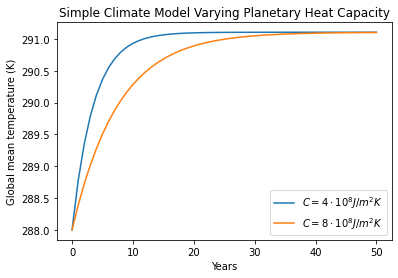

In [1]:
# copy paste code from the lecture to initialize variables 
#(it took some time sifting through the material to find them all)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds
OLRobserved = 238.5  # in W/m2
sigma = 5.67E-8  # S-B constant
Tsobserved = 288.  # global average surface temperature
tau = OLRobserved / sigma / Tsobserved**4  # solve for tuned value of transmissivity
Q = 341.3 # the insolation
Freflected = 101.9  #  reflected shortwave flux in W/m2
alpha = Freflected / Q # albedo
ASRobserved = Q - Freflected # from observations

# I cant find ASR and OLR functions defined in lecture notes. make my own
def ASR(alpha=alpha):
    '''
    returns absorbed shortwave radiation given arbitrary parameters alpha and Q
    '''
    ASR = (1 - alpha) * Q
    return ASR


def OLR(T, tau=tau):
    '''
    returns outgoing longwave radiation given arbitrary parameters tau, T, sigma
    '''
    OLR = tau * sigma * T ** 4
    return OLR

# direct from text
def step_forward(T):
    '''
    steps forward one timestep 
    '''
    return T + dt / C * ( ASR(alpha=0.32) - OLR(T, tau=0.57) )


# the main loop, direct from text just wrapped in a function
def main_loop(numsteps):
    '''
    executes the main loop a number of times specified by numsteps, returns arrays Tsteps and Years
    '''
    Tsteps = np.zeros(numsteps+1)
    Years = np.zeros(numsteps+1)
    Tsteps[0] = 288. 
    for n in range(numsteps):
        Years[n+1] = n+1
        Tsteps[n+1] = step_forward( Tsteps[n] )
    return Tsteps, Years

# Repeat our in-class time-stepping calculation with the same parameters we used before 
# (including a heat capacity of 𝐶=4×108 J m−2 K−1), but extend it to 50 years. 
default_Tsteps, default_years = main_loop(50)

# Now do it again, but use 𝐶=8×108 J m−2 K−1 (representing 200 meters of water). 
# You should create another 51-element array of temperatures also beginning from 288 K.
C = 8e8 # J m−2 K−1
modified_Tsteps, modified_years = main_loop(50)

# Make a well-labeled graph that compares the two temperatures over the 50-year period.
plt.plot(default_years, default_Tsteps, label='$C = 4\cdot 10^8 J/m^2K$')
plt.plot(modified_years, modified_Tsteps, label='$C = 8\cdot 10^8 J/m^2K$')
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
plt.title('Simple Climate Model Varying Planetary Heat Capacity')
plt.legend();

3. What do your results show about the role of heat capacity on climate change? **Give a short written answer.**

    <span style="color:blue">
    Based on this excercise, increasing heat capacity of the planet only slows down climate change, it has no effect on the final equilibrium temperature after the system has enough time to adjust to the new parameters
    </span>

## Problem 2: Albedo feedback in the Energy Balance Model

For this exercise, we will introduce a new physical process into our model by **letting the planetary albedo depend on temperature**. The idea is that a warmer planet has less ice and snow at the surface, and thus a lower planetary albedo.

Represent the ice-albedo feedback through the following formula:

$$ \alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i &   & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &   & T_i < T < T_o \\
\alpha_o &   & T \ge T_o \end{array} \right\}$$

with the following parameter values:

- $\alpha_o = 0.289$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.7$ is the albedo of a very cold, completely ice-covered planet
- $T_o = 293$ K is the threshold temperature above which our model assumes the planet is ice-free
- $T_i = 260$ K is the threshold temperature below which our model assumes the planet is completely ice covered. 

For intermediate temperature, this formula gives a smooth variation in albedo with global mean temperature. It is tuned to reproduce the observed albedo $\alpha = 0.299$ for $T = 288$ K. 

1. 
    - Define a Python function that implements the above albedo formula. *There is definitely more than one way to do it. It doesn't matter how you do it as long as it works!*
    -  Use your function to calculate albedos for a wide range on planetary temperature (e.g. from $T=250$ K to $T=300$ K.)
    - Present your results (albedo as a function of global mean temperature, or $\alpha(T)$) in a nicely labeled graph.

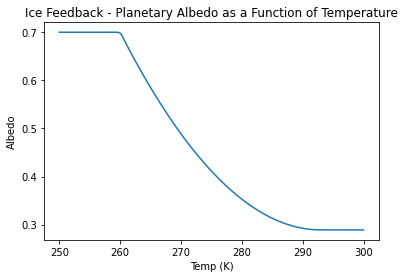

In [2]:
# Define a Python function that implements the above albedo formula. There is definitely more than one way to do it. 
# It doesn't matter how you do it as long as it works!
def get_alpha(T):
    """
    returns albedo alpha based on input temperature
    """
    T0 = 293 # K
    Ti = 260 # K
    alpha_0 = 0.289 # albedo of ice free planet
    alpha_i = 0.7 # albedo of completely icey planet
    
    if T <= Ti:
        return alpha_i
    elif T >= T0:
        return alpha_0
    else:
        return alpha_0 + (alpha_i - alpha_0) * ((T - T0) ** 2 / (Ti - T0) ** 2)
    
# Use your function to calculate albedos for a wide range on planetary temperature (e.g. from 𝑇=250 K to 𝑇=300K.)
# Present your results (albedo as a function of global mean temperature, or 𝛼(𝑇)) in a nicely labeled graph.
temps = np.linspace(250,300,100)
albedos = np.empty_like(temps)
for i in range(len(temps)):
    albedos[i] = get_alpha(temps[i])
    
plt.plot(temps, albedos)
plt.xlabel('Temp (K)')
plt.ylabel('Albedo')
plt.title('Ice Feedback - Planetary Albedo as a Function of Temperature');

2. Now investigate a climate change scenario with this new model:
    - Suppose that the transmissivity decreases from 0.611 to 0.57 (same as before)
    - Your task is to **calculate the new equilibrium temperature**. First, explain very briefly why you can't just solve for it analytically as we did when albedo was a fixed number.
    
    <span style="color:blue">
    We have introduced a non-linear term into the DE governing the system (the piecewise function describing albedo). Now there is no analytical solution so we need to solve it numerically.
    </span>
    - Instead, you will use numerical time-stepping to find the equilibrium temperature
    - Repeat the procedure from Question 3 *(time-step forward for 50 years from an initial temperature of 288 K and make a graph of the results)*, but this time **use the function you defined above to compute the albedo for the current temperature**.

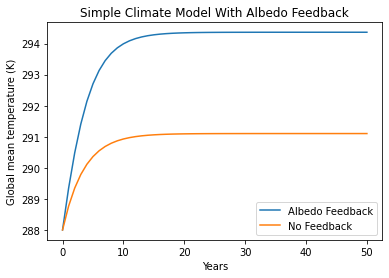

In [3]:
# all i need to do is modify the step_forward() function to readjust the albedo at 
# every timestep, then run main_loop again
def step_forward(T):
    '''
    steps forward one timestep, modified to include albedo feedback
    '''
    current_alpha = get_alpha(T) # just added this line
    return T + dt / C * ( ASR(alpha=current_alpha) - OLR(T, tau=0.57) )

C = 4e8 # dont forget to reset heat capacity to the default!

# run main loop with feedback
feedback_Tsteps, feedback_years = main_loop(50)

# plot the new result and compare with the old
plt.plot(feedback_years, feedback_Tsteps, label='Albedo Feedback')
plt.plot(default_years, default_Tsteps, label='No Feedback')
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
plt.title('Simple Climate Model With Albedo Feedback')
plt.legend();

Is the **new equilibrium temperature larger or smaller** than it was in the model with fixed albedo? **Explain why in your own words.**

<span style="color:blue">
    The new equilibrium temperature is larger once we introduce ice feedback. This is a positive feedback loop, where a small increase in temperature creates favorable conditions for further increases in temperature (ie ice melts, causes warming, causes more ice to melt et cyc.) The same is true for cooling in this case, (a negative temperature perturbation causes more ice causes more cooling).
</span>


## Bonus problem

*Open-ended investigation for extra credit, not required*

Something very different occurs in this model if you introduce a strong negative radiative forcing, either by substantially reducing greenhouse gases (which we would represent as an increase in the transmissivity $\tau$), or by decreasing the incoming solar radiation $Q$.

Investigate, using your numerical model code, and report your results along with your thoughts.

<span style="color:blue">
Let's model the first scenario where we suddenly increase the longwave transmissivity, maybe by pulling CO2 out of the atmosphere super quickly. Reset everything to the default values, then see what happens when we increase the value of $\tau$ by 10% increments.
</span>

In [4]:
# restore the original stepping function and define an array of tau values increasing by 5% 
def step_forward(T):
    '''
    steps forward one timestep 
    '''
    return T + dt / C * ( ASR(alpha=0.32) - OLR(T, tau=tau) )

perturb_tau = np.arange(tau,1.5*tau,tau*0.1) # this is a handy function similar to np.linspace(), but 
                                             # instead it creates an array defined by (start,stop,stepsize)
print(perturb_tau)

[0.61141399 0.67255539 0.73369679 0.79483819 0.85597959]


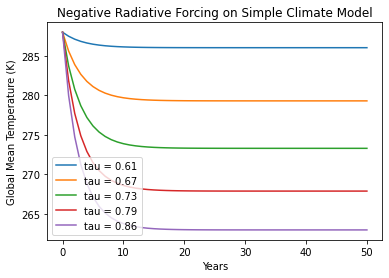

In [7]:
for the_tau in perturb_tau:
    tau = the_tau
    Tsteps, years = main_loop(50)
    plt.plot(years,Tsteps, label=f'tau = {round(tau,2)}')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Global Mean Temperature (K)')
plt.title('Negative Radiative Forcing on Simple Climate Model');

<span style="color:blue">
    Increasing the LW transmissivity causes the equilibrium temperature to decrease instead of increase. The planet cools until outgoing radiation again matches the incoming SW.
</span>

____________

## Credits

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________